# Pre-process UNIONS 800 deg^2 cat
From Stephen Gwyns 800 deg^2 multi-band catalogues (v1, v2)

Extract tile IDs.
Create FITS file.
Plot spatial distribution.

In [1]:
import os
import pandas as pd
from shapepipe.pipeline import file_io
from sp_validation.plots import *

## Load catalogue

In [2]:
# UNIONS

# Full catalogue
base_name_ph = 'unions.ugriz2'

cat_ph = pd.read_csv(f'{base_name_ph}.tsv', delimiter='\s+')

In [3]:
print('Keys in UNIONS catalogue:')
print(cat_ph.keys())

Keys in UNIONS catalogue:
Index(['RA', 'Dec', 'CFIS_ID', 'CFIS_U_MAG_AUTO', 'CFIS_U_MAGERR_AUTO',
       'HSC_G_MAG_AUTO', 'HSC_G_MAGERR_AUTO', 'CFIS_R_MAG_AUTO',
       'CFIS_R_MAGERR_AUTO', 'PS_i_stk_kron', 'PS_i_stk_kron_err',
       'PS_z_stk_kron', 'PS_z_stk_kron_err', 'CFIS_R_StarGal'],
      dtype='object')


In [4]:
# The ID is encoded at positions 123456 in the ID string
# Extract this string and create a set of unique IDs

IDs = []
for ID_int in cat_ph.CFIS_ID:
    s = f'{ID_int}'
    ra = s[1:4]
    dec = s[4:7]
    ID = f'{ra}.{dec}'
    IDs.append(ID)
IDs_set = set(IDs)

In [5]:
with open('tile_numbers.txt', 'w') as f:
    for ID in IDs_set:
        print(ID, file=f)

In [6]:
len(IDs_set)

2260

In [5]:
t = Table.from_pandas(cat_ph)
keys = t.keys()

In [8]:
print(keys)

['RA', 'Dec', 'CFIS_ID', 'CFIS_U_MAG_AUTO', 'CFIS_U_MAGERR_AUTO', 'HSC_G_MAG_AUTO', 'HSC_G_MAGERR_AUTO', 'CFIS_R_MAG_AUTO', 'CFIS_R_MAGERR_AUTO', 'PS_i_stk_kron', 'PS_i_stk_kron_err', 'PS_z_stk_kron', 'PS_z_stk_kron_err', 'CFIS_R_StarGal']


In [9]:
keys_out= ['RA', 'Dec', 'CFIS_ID']

In [10]:
cols = []
for key in keys_out:
    cols.append(fits.Column(name=key, format='D', array=t[key]))

In [11]:
hdu  = fits.BinTableHDU.from_columns(cols)

In [12]:
hdu.writeto(f'{base_name_ph}.fits')

## Plots

### Spatial distribution

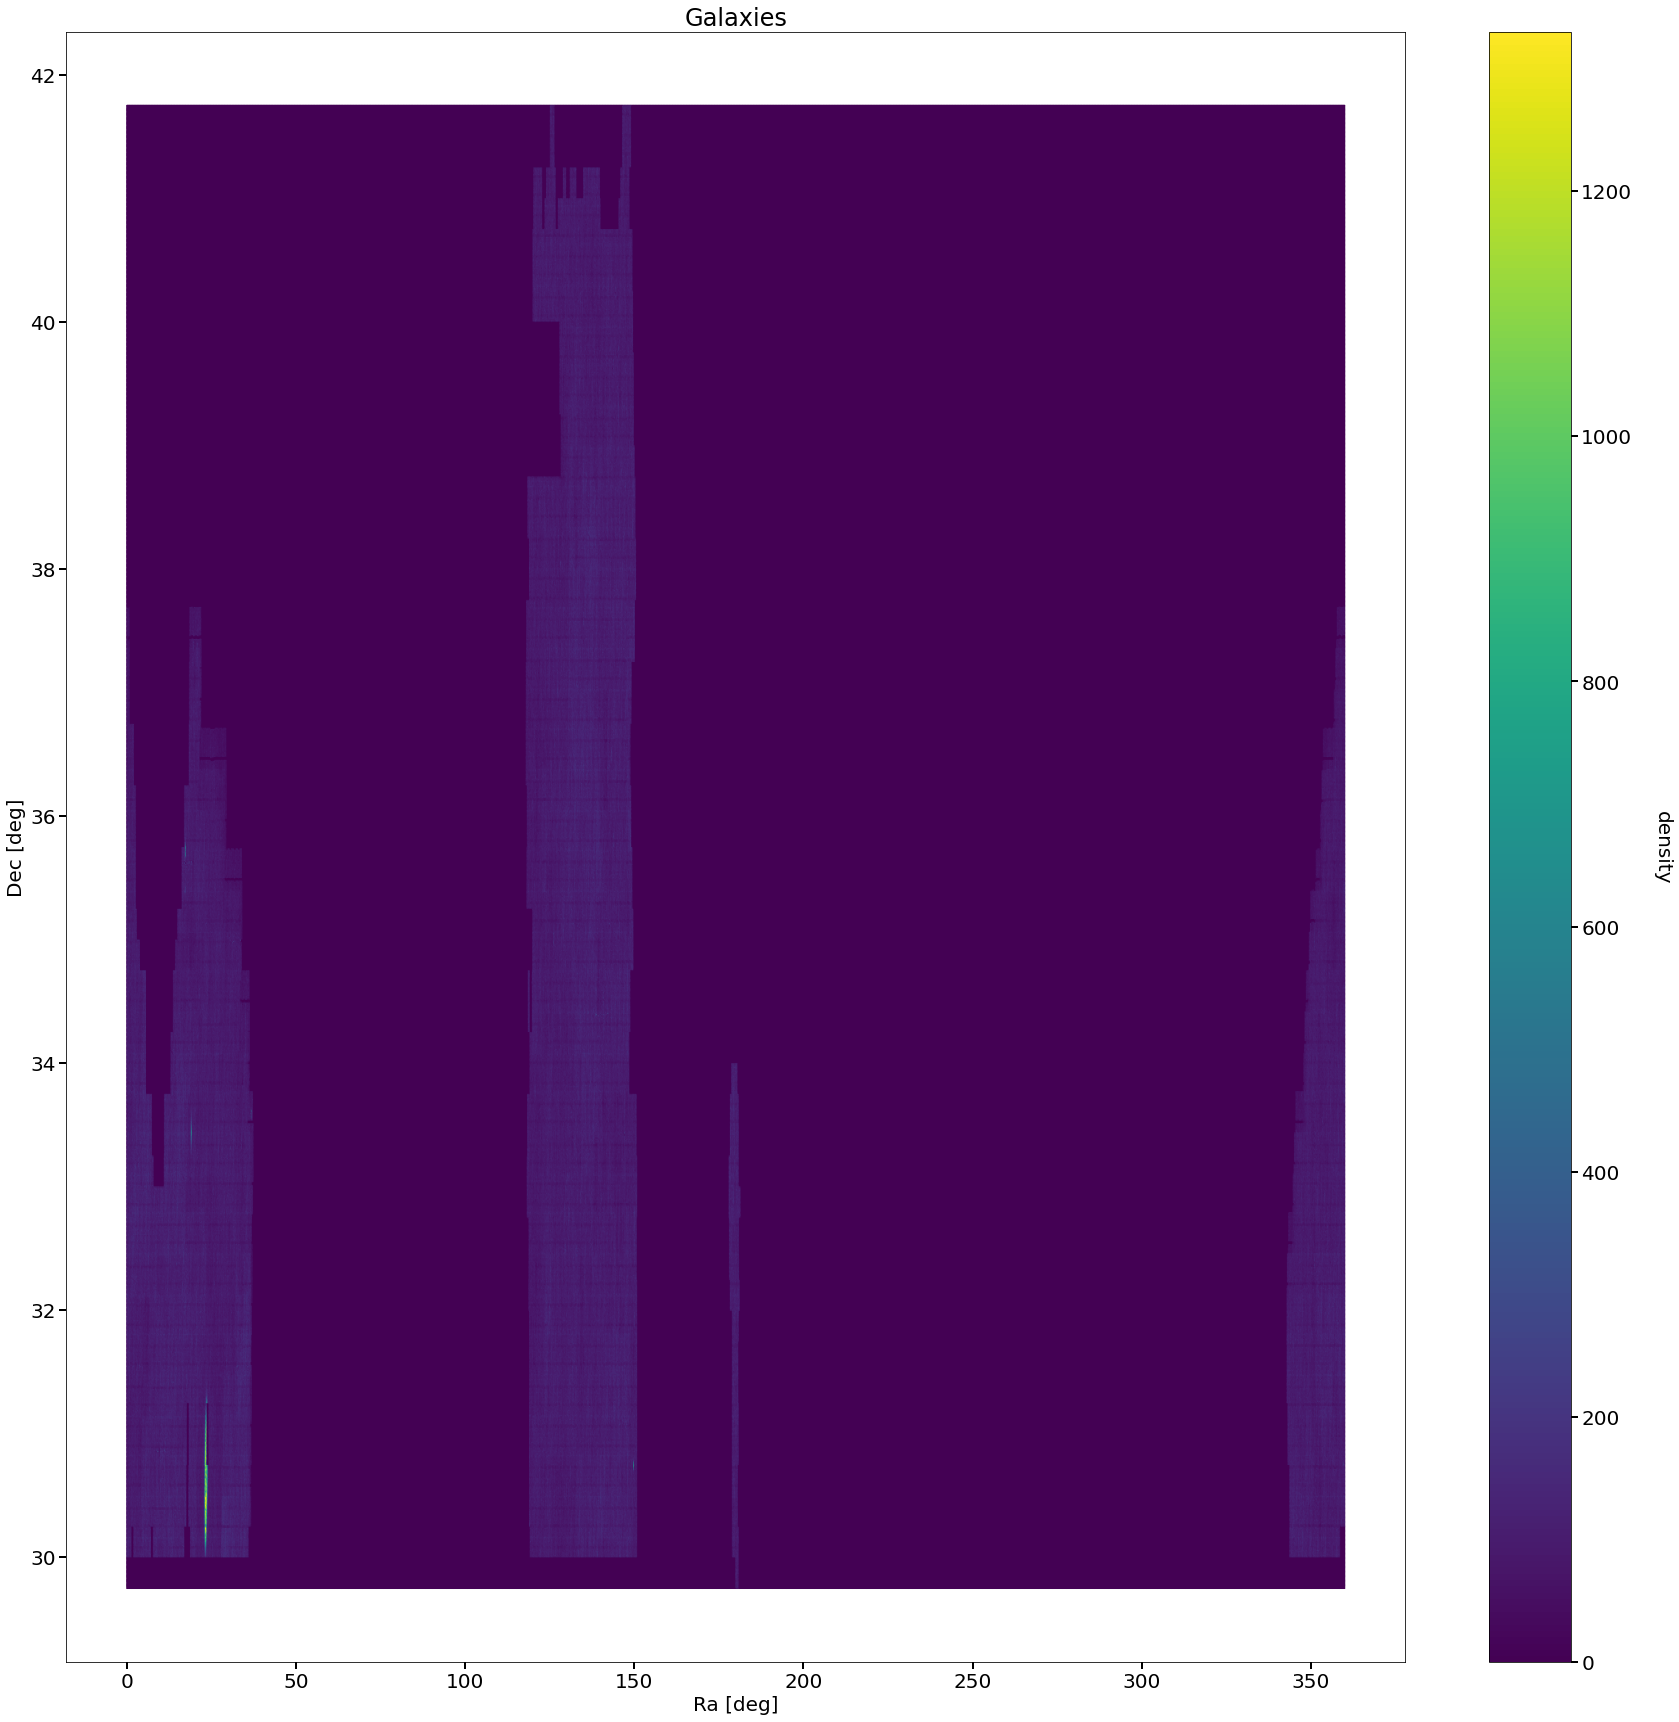

In [14]:
# Galaxies
n_grid = 2000
cbar_label = 'density'

title = 'Galaxies'
out_path = 'unions_800d2_all'
plot_spatial_density(
    cat_ph['RA'],
    cat_ph['Dec'],
    title,
    'Ra [deg]',
    'Dec [deg]',
    cbar_label,
    out_path,
    n_grid=n_grid,
    verbose=True
)